" Student Performance Data Analysis"

 TASK 3 : EDA and Visualizations

In [ ]:
Visualisations
  * Use Matplotlib / Seaborn / Plotly to generate meaningful visualizations:
      *Bar plot,line chart,pie chart,box plot,scatter plot,histogram,etc
      *ensure visuals should have proper title,label and colour schemes

1 IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2 Reading The Dataset

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\archive.zip")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


* Check Columns

In [3]:
print(df.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


* Convert Categorical Columns

In [6]:
cat_col=['school','sex','address','pstatus','Mjob','Fjob','reason','guardian','schoolup',
         'famsup','paid','activities','nursery','higher','interest','romantic']
for col in cat_col:
    if col in df.columns:
        df[col]=df[col].astype('category')
    else:
        print(f"column{col}not found!")

columnpstatusnot found!
columnschoolupnot found!
columninterestnot found!


* Checking Missing Values

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

EDA and Visualisations

1.BOXPLOT of Absences Before Cleaning

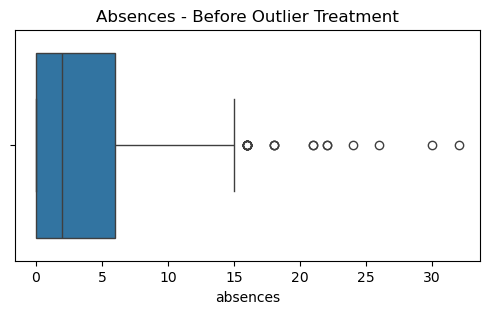

In [9]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["absences"])
plt.title("Absences - Before Outlier Treatment")
plt.show()

* Treat Outliers

In [11]:
q1=df["absences"].quantile(0.25)
q3=df["absences"].quantile(0.75)
iqr=q3-q1

lower=q1-1.5*iqr
upper=q3+1.5*iqr

df["absences"]=df["absences"].clip(lower,upper)




* Boxplot of Absences After Cleaning

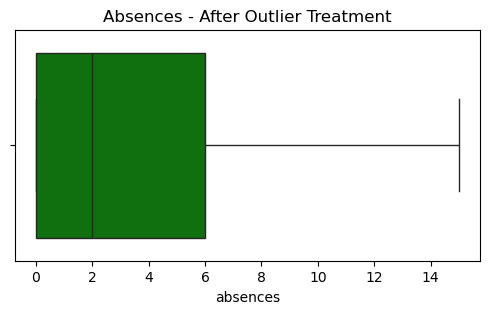

In [48]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["absences"],color='green')
plt.title("Absences - After Outlier Treatment")
plt.show()

2 Correlation Heatmap

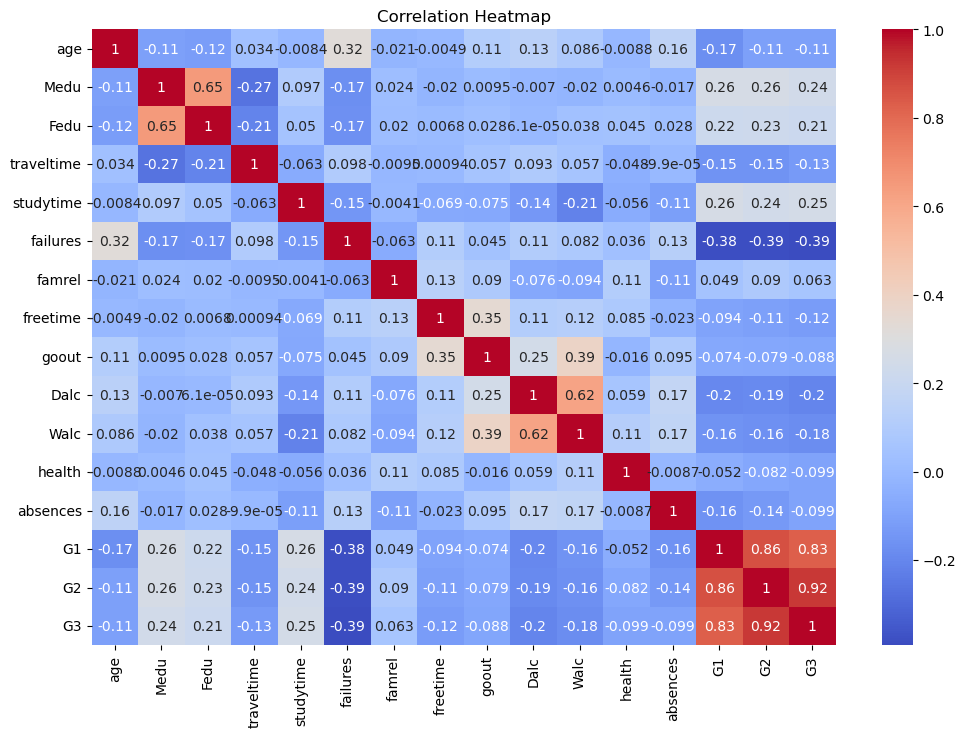

In [15]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

3 Count Plot
 * Create Performance Categories

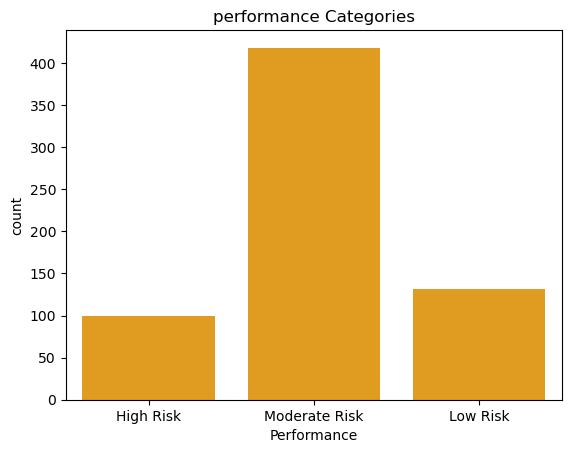

In [37]:
#function to assign risk levels
def performance_category(grade):
    if grade<10:
        return "High Risk"
    elif 10<=grade<15:
        return "Moderate Risk"
    else:
        return "Low Risk"
        
#apply fuction 
df["Performance"]=df["G3"].apply(performance_category)

#plot distribution
sns.countplot(x="Performance",data=df,color="orange",order=["High Risk","Moderate Risk","Low Risk"])
plt.title("performance Categories")
plt.show()

Text(0.5, 1.0, 'G3 - Number of students')

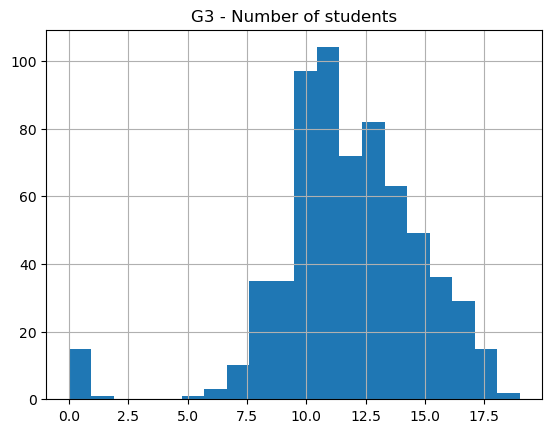

In [36]:
df["G3"].hist(bins=20)
plt.title('G3 - Number of students')

5. PIE Chart

<Axes: title={'center': 'Count sex of Students'}, ylabel='count'>

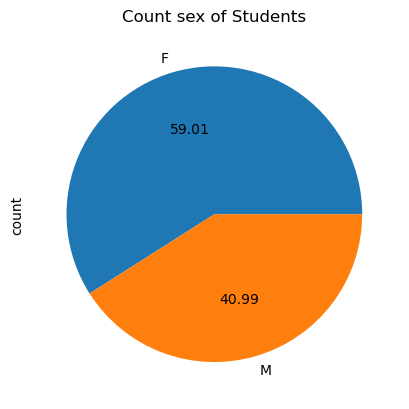

In [33]:
df.sex.value_counts().plot(kind="pie",autopct='%.2f',title="Count sex of Students")

6.Bar Plot
 * sex and final grade relationship

Text(0.5, 1.0, 'Sex and the final Grade Relationship')

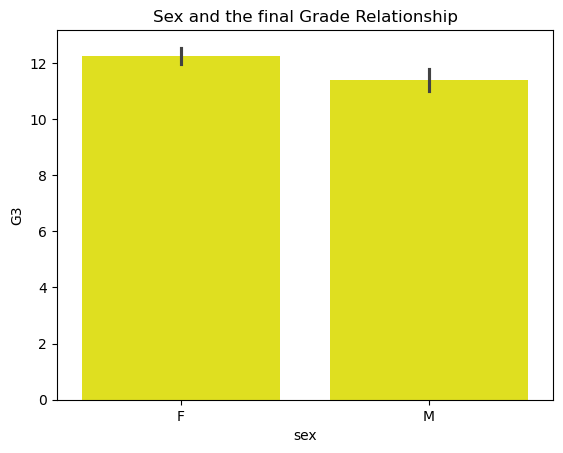

In [39]:
sns.barplot(x='sex',y='G3',data=df,color='yellow')
plt.title('Sex and the final Grade Relationship')

7. Bar Plot
  * age and the final grade ralationship

Text(0.5, 1.0, 'Age and the final Grade Relationship')

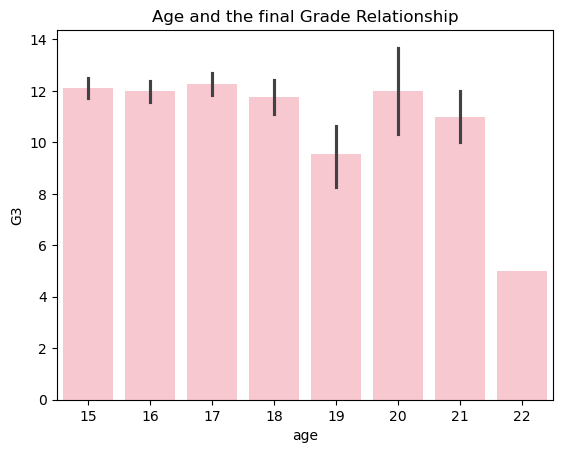

In [47]:
sns.barplot(x='age',y='G3',data=df,color='pink')
plt.title('Age and the final Grade Relationship')

Text(0, 0.5, 'G3')

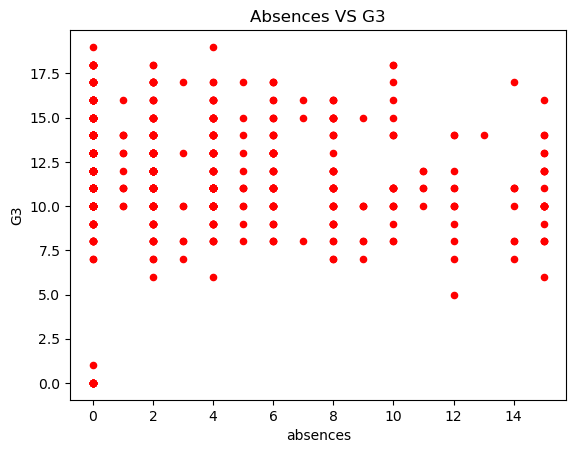

In [52]:
df.plot.scatter(x="absences",y="G3",color="red")
plt.title("Absences VS G3")
plt.xlabel("absences")
plt.ylabel("G3")

9. Line Chart
  * G3 Mean by absence count

In [54]:
grouped_abs_mean=df.groupby('absences').agg({'G3':['mean']})
print(grouped_abs_mean)

                 G3
               mean
absences           
0         12.040984
1         12.416667
2         12.190909
3         10.428571
4         12.010753
5         11.750000
6         12.122449
7         13.000000
8         11.619048
9          9.714286
10        12.238095
11        11.200000
12        10.083333
13        14.000000
14        10.375000
15        10.782609


Text(0, 0.5, 'G3 Mean')

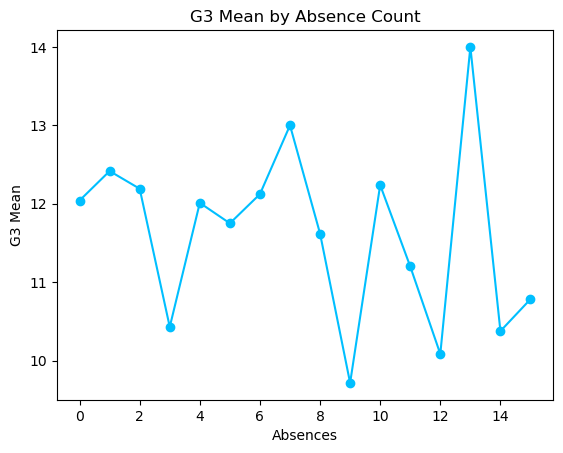

In [55]:
plt.plot(grouped_abs_mean,color='deepskyblue',marker='o')
plt.title('G3 Mean by Absence Count')
plt.xlabel('Absences')
plt.ylabel('G3 Mean')

10. Box Plot

<Axes: xlabel='activities', ylabel='G3'>

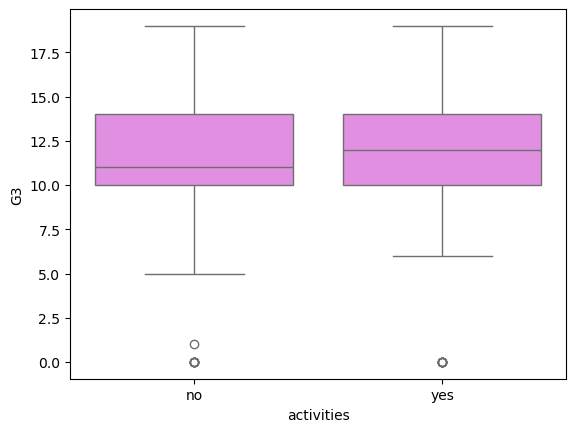

In [63]:
sns.boxplot(x='activities',y='G3',
data=df,color='violet')

<Axes: xlabel='romantic', ylabel='G3'>

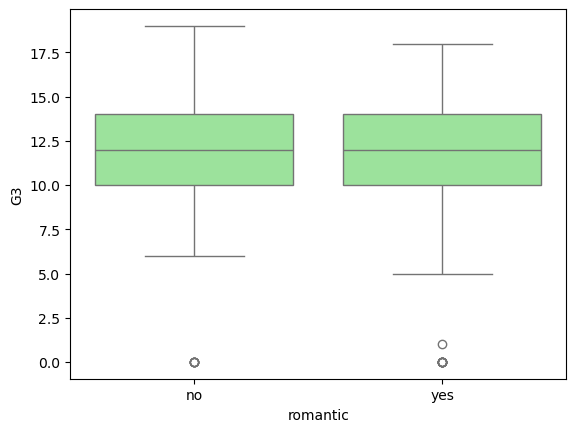

In [64]:
sns.boxplot(x='romantic',y='G3',
data=df,color='lightgreen')

<Axes: xlabel='internet', ylabel='G3'>

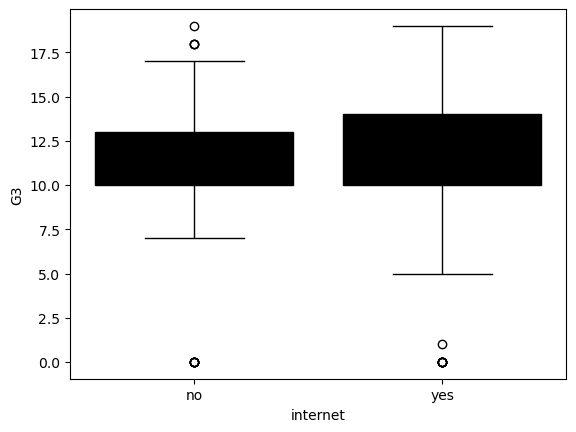

In [66]:
sns.boxplot(x='internet',y='G3',
data=df,color='black')

<Axes: xlabel='schoolsup', ylabel='G3'>

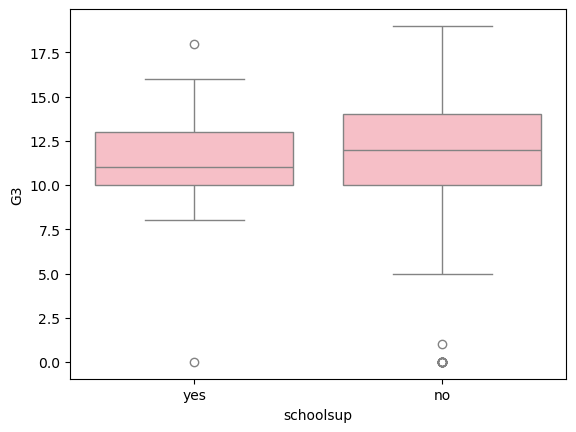

In [67]:
sns.boxplot(x='schoolsup',y='G3',
data=df,color='lightpink')

After examining boxplots,I've come to a conclusion that the following numerical and categorical features have an inpact on G3:
  * Numeical:studytime,failure,DALC,Walc,Traveltime,Freetime,Medu and Fedu,G1,G2
  * Categorical:Sex,School,Address,Mjob+Fjob,Reason,Guardian,Schoolsup,Higher,Internet

I Have given it a lot of thouhts and here is what I'm thinking

The point of this notebook is to find G3,of course by selecting the best model and the best features for that.And we are visualising,analysing these features,such as traveltime from home to school or possible drinking problems or romantic affairs,family statuses and so on and so on... we are basically thinking of things,that influence our grades.so,based on these thoughts,it would've been better to get rid off G1 & G2,since these are grades for first and second halves of the year respectively.And they are ,as much as G3 reflections of the features choses.Instead of having three grades,we should make one mean out of them.